In [1]:
import os
from threading import Thread
from time import *

from numpy import *
from matplotlib.pyplot import *
from serial import Serial
from serial.tools import list_ports
#from scipy.interpolate import interp1d

In [4]:

mfreq  = 30     # seconds between the measurements
alarmT = 0.5    # degrees of the deviation to color the button in red
alarmL = 1000   # arbitrary units of illumination
refT   = 25     # reference temperature


In [5]:
MAXPOWER = 300 # Watts. Heater nominal power
POWER    = 200 # Initial guess. Should be corrected according to the experimental data.


In [9]:
POWER = 200
TLOG = [23.95,23.9,24.92] * 50

# TLOG.append(mean(tmp))
if len(TLOG) > 30:
    TLOG = TLOG[-30:]
    # reat angle
    angR = polyfit(linspace(0,30*mfreq,30), TLOG ,1)[0]
    # real delta
    dltT = refT - mean(TLOG)
    # desired ange, to reach the reference after an hour
    angD = arctan(dltT / 1.125 * 3600)
    # coef, heat capacity and the mass of water
    coef = 4200 * 500
    # desired power
    print(POWER, angD, angR, coef)
    POWER = POWER + (angD - angR) * coef
    print(POWER)
    if POWER < 0:
        POWER = 0
    elif POWER > MAXPOWER:
        POWER = MAXPOWER
    print('POWER: %dW' % POWER)
    # switch power on. 29800 - is a bit less than 30 seconds
    # stm32.SwithcPowerOn(round(29800 * POWER / MAXPOWER))
# disconnect the device
# stm32 = 0

200 1.5703759232322199 0.00013906810035842882 2100000
3297697.3957769093
POWER: 300W


In [14]:
angR

1.2114695340492455e-05

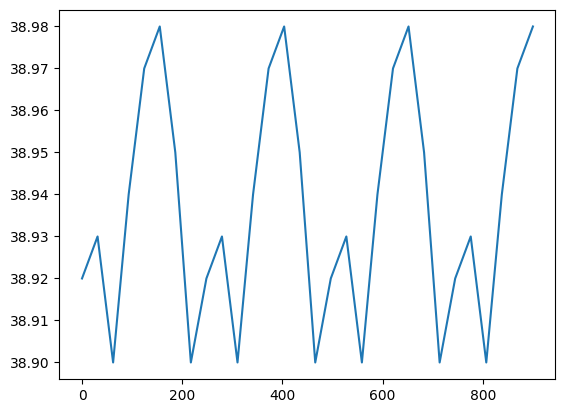

In [15]:
plot(linspace(0,30*mfreq,30), TLOG)

In [9]:
import requests
from subprocess import PIPE, Popen

In [4]:
with open("tmp.txt", "w") as fout:
    p = Popen(["ls"], stdout=fout)
    p.communicate()

In [10]:
URL_SEND_MESSAGES="http://127.0.0.1:37894/fish/file-upload"


files = {'file': open('logs/last_message.log','rb')}
r = requests.post(URL_SEND_MESSAGES, files=files)
r

<Response [500]>

In [27]:
r.text

'{"message":"File successfully uploaded"}\n'

In [2]:
import json

In [10]:
with open("config.json") as fin:
    config = json.load(fin)

In [11]:
config

{'bot_max_message_size': 1700,
 'bot_guild_name': 'mitoclub',
 'bot_receiver_error': 'kpotoh',
 'bot_receiver_warn': 'byqot',
 'app_ip': '0.0.0.0',
 'app_port': 37894,
 'app_python_cmd': 'python3.8',
 'app_max_time_between_sendings': 20,
 'app_max_content_lenght': 100000,
 '': ''}

In [7]:
print(json.dumps(config, indent="  "))

{
  "path": "file",
  "nval": 8
}
